In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from scipy.stats import mannwhitneyu
import warnings

# ignore numpy warnings
warnings.filterwarnings("ignore")

In [16]:
def plot_results(sa_log_file, ga_log_file, mem_log_file, plot_title):
    plt.figure(figsize=(4, 6))
    # load the files from csv format, one run is one row
    ga_df = pd.read_csv("logs/" + sa_log_file, header=None).T
    nsga_df = pd.read_csv("logs/" + ga_log_file, header=None).T
    mem_log_file = pd.read_csv("logs/" + mem_log_file, header=None).T

    # remove the last column which is empty
    ga_df = ga_df.iloc[:, :-1]
    nsga_df = nsga_df.iloc[:, :-1]
    mem_log_file = mem_log_file.iloc[:, :-1]

    ga_mean = np.nanmean(ga_df, axis=1)
    nsga_mean = np.nanmean(nsga_df, axis=1)
    mem_mean = np.nanmean(mem_log_file, axis=1)

    ga_std = np.nanstd(ga_df, axis=1)
    nsga_std = np.nanstd(nsga_df, axis=1)
    mem_std = np.nanstd(mem_log_file, axis=1)

    # p_vals = mannwhitneyu(
    #     ga_df, 
    #     nsga_df, 
    #     axis=1, 
    #     alternative='two-sided'
    # ).pvalue

    # significant_diff = p_vals < 0.05

    # plot the mean and variance of the runs
    plt.plot(ga_mean, label="SA")
    plt.plot(nsga_mean, label="GA")
    plt.plot(mem_mean, label="Memetic GA")
    plt.fill_between(range(len(ga_mean)), ga_mean - ga_std, ga_mean + ga_std, alpha=0.2)
    plt.fill_between(range(len(nsga_mean)), nsga_mean - nsga_std, nsga_mean + nsga_std, alpha=0.2)
    plt.fill_between(range(len(mem_mean)), mem_mean - mem_std, mem_mean + mem_std, alpha=0.2)

    # # add scatterplot with significant differences, green - significant, red - not significant
    # for i in range(len(significant_diff)):
    #     if significant_diff[i]:
    #         plt.scatter([i], [ga_mean[i]], c='green', s=10)
    #     else:
    #         plt.scatter([i], [ga_mean[i]], c='red', s=10)

    # # plot the optimum line
    # plt.plot([0, len(ga_mean)], [optimum_line, optimum_line], label="Optimum", linestyle='--')

    # make y axis logarithmic
    plt.yscale("log")

    plt.legend()
    plt.xlabel("#200 of iterations")
    plt.ylabel("Fitness")
    plt.title(plot_title)
    plt.show()

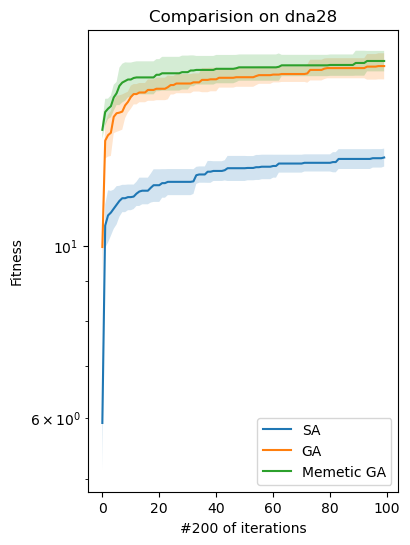

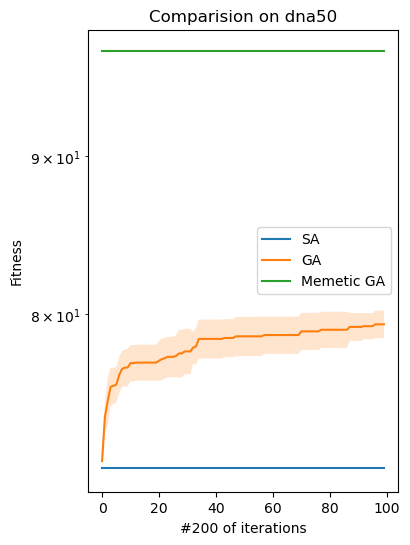

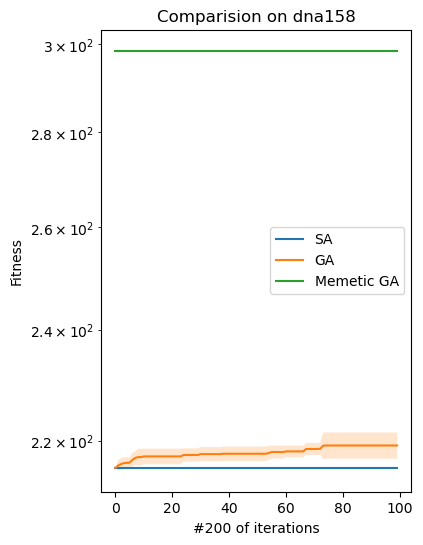

In [18]:
plot_results(
    'sa_dna_28.csv', 
    'ga_dna_28.csv',
    'ga_dna_28_al.csv', 
    plot_title="Comparision on dna28"
)
plot_results(
    'sa_dna_50.csv',
    'ga_dna_50.csv',
    'ga_dna_50_al.csv',
    plot_title="Comparision on dna50"
)
plot_results(
    'sa_dna_158.csv',
    'ga_dna_158.csv',
    'ga_dna_158_al.csv',
    plot_title="Comparision on dna158"
)